# Geração do gráfico

## Importando modulos necessários

In [6]:
from scipy.interpolate import UnivariateSpline
import numpy as np

from matplotlib.animation import FuncAnimation, PillowWriter
import matplotlib.pyplot as plt
from matplotlib import rc

from IPython.display import HTML

## Dados de entrada

In [7]:
comprimento = np.arange(0, 111.5, 0.5)

penetracao = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.124,
    0.112, 0.15, 0.17, 0.21, 0.124, 0.5, 0.498, 0.497, 0.496, 0.403, 0.115, 0.4, 0.627,
    0.77, 0.868, 0.867, 0.866, 0.773, 0.771, 0.77, 0.768, 0.767, 0.766, 0.256, 0.254,
    0.253, 0.379, 0.606, 0.605, 0.603, 0.464, 0.6, 0.751, 0.46, 0.459, 0.457, 0.456, 0.454,
    0.234, 0.3, 0.53, 0.297, 0.527, 0.526, 0.525, 0.291, 0.522, 0.52, 0.519, 0.517, 0.284,
    0.515, 0.513, 0.512, 0.278, 0.509, 0.508, 0.506, 0.273, 0.271, 0.502, 0.268, 0.267,
    0.266, 0.264, 0.263, 0.261, 0.26, 0.259, 0.318, 0.316, 0.315, 0.185, 0.181, 0.18, 0.687,
    0.686, 0.394, 0.683, 0.681, 0.47, 0.526, 0.169, 0.267, 0.522, 0.52, 0.263, 0.517, 0.26,
    0.457, 0.456, 0.256, 0.25, 0.662, 0.45, 0.25, 0.249, 0.446, 0.246, 0.244, 0.652, 0.65,
    0.649, 0.495, 0.493, 0.492, 0.643, 0.733, 0.732, 0.486, 0.347, 0.346, 0.635, 0.481, 0.479,
    0.478, 0.721, 0.475, 0.913, 0.335, 0.215, 0.213, 0.212, 0.39, 0.176, 0.172, 0.17, 0.202,
    0.457, 0.199, 0.198, 0.196, 0.314, 0.45, 0.192, 0.447, 0.698, 0.688, 0.595, 0.515, 0.513,
    0.438, 0.299, 0.435, 0.508, 0.295, 0.294, 0.292, 0.581, 0.5, 0.425, 0.498, 0.667, 0.574,
    0.493, 0.418, 0.417, 0.489, 0.659, 0.627, 0.485, 0.153, 0.482, 0.621, 0.845, 0.933, 1.308,
    1.436, 1.434, 0.926, 1.218, 1.3, 1.07, 1.214, 1.425, 1.211, 0.915, 1.207, 1.205, 0.821,
    1.057, 1.414, 1.054, 0.816, 1.052, 1.5, 1.499, 1.047, 0.809, 1.044, 1.493, 1.042, 0.803,
    0.576, 0.434, 0.222, 0.51, 0.514
])

## Penetração Suavizada

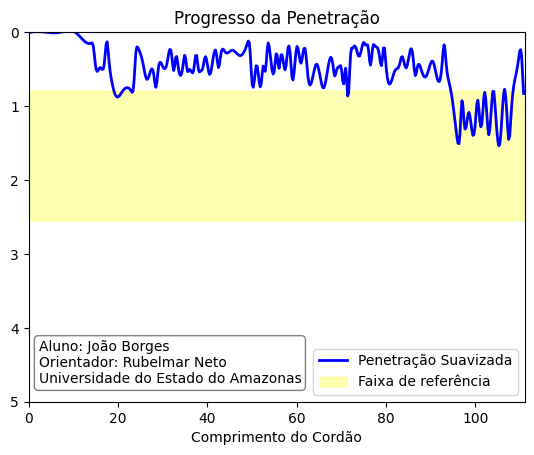

In [8]:
# Suavizando os dados
spl = UnivariateSpline(comprimento, penetracao, s=0.2)
comprimento_suavizado = np.linspace(min(comprimento), max(comprimento), 500)
penetracao_suavizada = spl(comprimento_suavizado)

# Configuração do GIF
fig, ax = plt.subplots()
line, = ax.plot([], [], 'b-', lw=2, label="Penetração Suavizada")

ax.set_xlim(0, max(comprimento))
ax.set_ylim(5, 0)

ax.set_xlabel('Comprimento do Cordão')
ax.set_title('Progresso da Penetração')

# Faixa de referência (25% a 80% do valor máximo)
ref_min = 0.793
ref_max = 2.54

ref_band = ax.fill_between(
    x=comprimento,
    y1=ref_min,
    y2=ref_max,
    color='yellow',
    alpha=0.3,
    label='Faixa de referência'
)
legend = ax.legend(loc = 'lower right')


# Adicionando legenda personalizada
additional_legend = (
    "Aluno: João Borges\n"
    "Orientador: Rubelmar Neto\n"
    "Universidade do Estado do Amazonas"
)
plt.text(
    x=0.02, 
    y=0.05, 
    s=additional_legend, 
    transform=ax.transAxes,
    fontsize=10, 
    verticalalignment='baseline', 
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.5)
)

# Função para atualizar cada quadro
def update(frame):
    line.set_data(comprimento_suavizado[:frame], 
    penetracao_suavizada[:frame])
    return line,

# Criação da animação
frames = len(comprimento_suavizado)
ani = FuncAnimation(fig, update, frames=frames, interval=50, blit=True)
rc('animation', embed_limit=50)

# Exibindo a animação
HTML(ani.to_jshtml())
ani.save("output/progressao_suavizada.gif", writer=PillowWriter(fps=10))

## Penetração Invertida

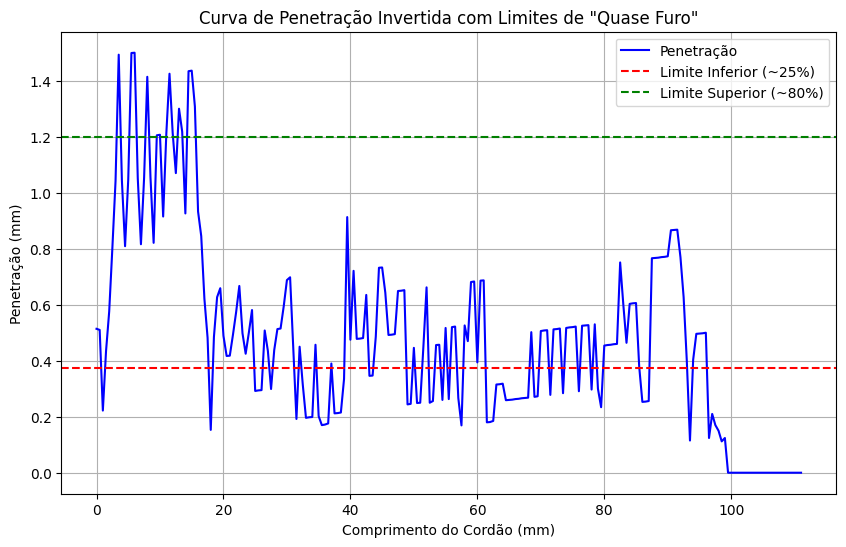

<Figure size 640x480 with 0 Axes>

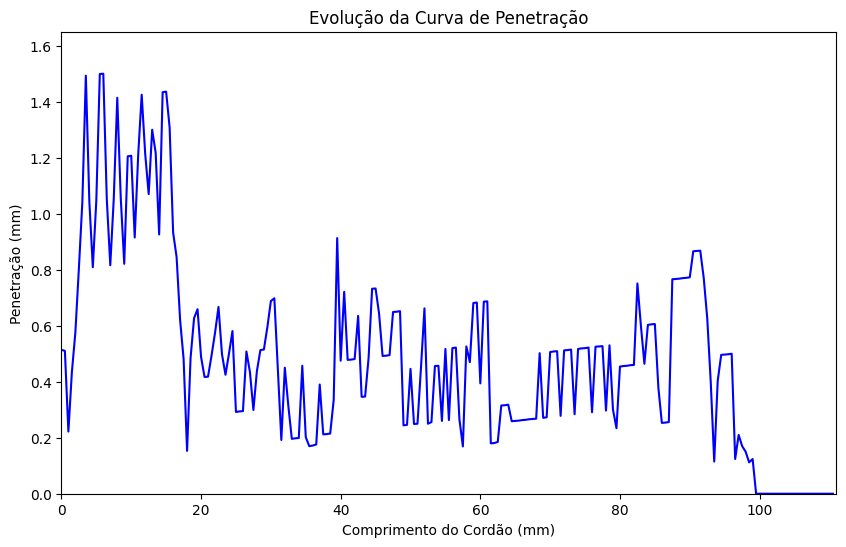

In [9]:
penetracao = penetracao[::-1]

# Faixa de "quase furo"
limite_inferior = 0.25 * np.max(penetracao)
limite_superior = 0.80 * np.max(penetracao)

# Plot estático
plt.figure(figsize=(10, 6))
plt.plot(comprimento, penetracao, label='Penetração', color='blue')
plt.axhline(limite_inferior, color='red', linestyle='--', label='Limite Inferior (~25%)')
plt.axhline(limite_superior, color='green', linestyle='--', label='Limite Superior (~80%)')
plt.xlabel('Comprimento do Cordão (mm)')
plt.ylabel('Penetração (mm)')
plt.title('Curva de Penetração Invertida com Limites de "Quase Furo"')
plt.legend()
plt.grid()
plt.show()
plt.savefig('output/curva_penetracao_invertida.png', dpi=300)

# Código para gerar GIF
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(0, np.max(comprimento))
ax.set_ylim(0, 1.1 * np.max(penetracao))
ax.set_xlabel('Comprimento do Cordão (mm)')
ax.set_ylabel('Penetração (mm)')
ax.set_title('Evolução da Curva de Penetração')
line, = ax.plot([], [], color='blue')

# Função de atualização para o GIF
def update(frame):
    line.set_data(comprimento[:frame], penetracao[:frame])
    return line,

ani = FuncAnimation(fig, update, frames=len(comprimento), interval=50, blit=True)

# Salvar o GIF
HTML(ani.to_jshtml())
ani.save('output/evolucao_penetracao.gif', writer=PillowWriter(fps=10))

plt.show()
